<a href="https://colab.research.google.com/github/sergekamanzi/wine_quality/blob/main/red_wine_quality_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**importing PANDAS for my dataset**

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

In [ ]:
#%%capture
# Load datasets for red and white wines
red = pd.read_csv('/content/winequality-red.csv', sep=';')
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#%%capture
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
#%%capture
red.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
#%%capture
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**Statistical Summary and Feature Correlation of Red Wine Data**

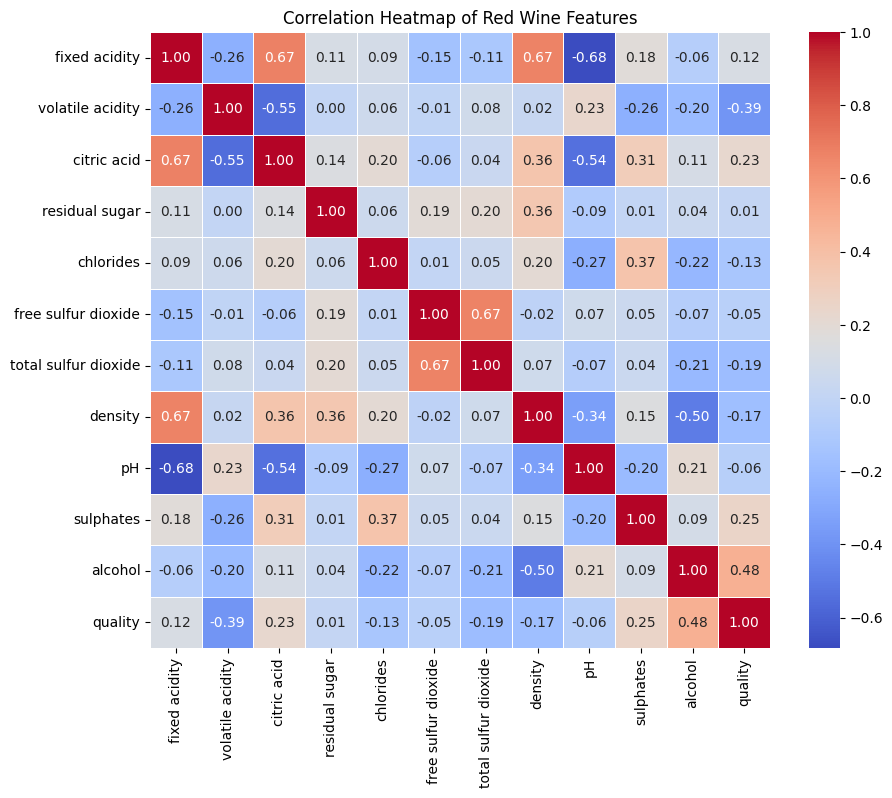

In [ ]:
#%%capture
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap to see relationships between features
plt.figure(figsize=(10, 8))
sns.heatmap(red.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Red Wine Features')
plt.show()

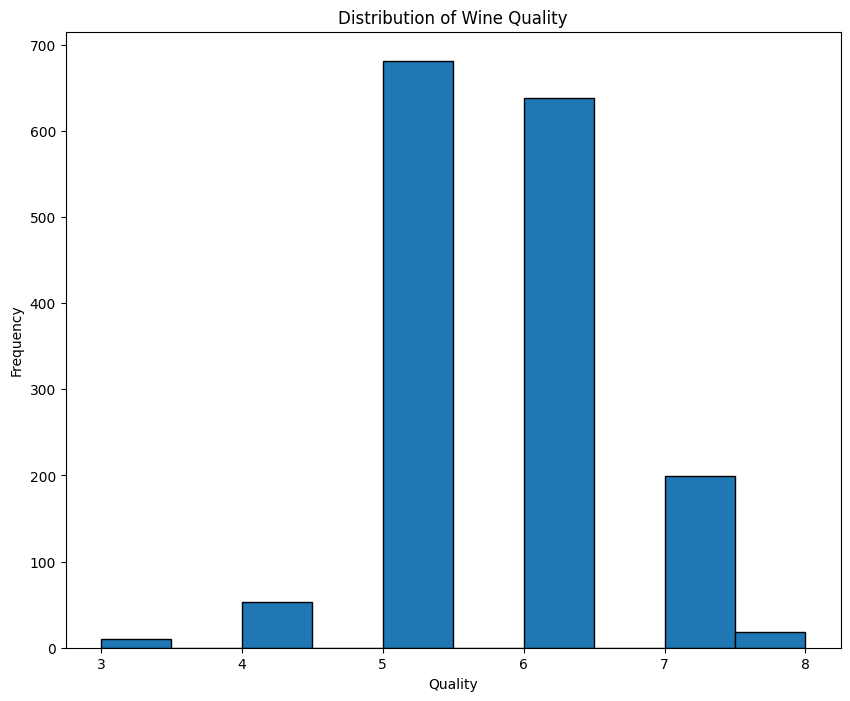

In [ ]:
plt.figure(figsize=(10, 8))
plt.hist(red['quality'], bins=10, edgecolor='k')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.title('Distribution of Wine Quality')
plt.show()

**standardize my datas**



In [ ]:
from sklearn.preprocessing import StandardScaler
import joblib

# Features that need scaling
X=red.drop(['quality'], axis=1)
Y=red['quality']


# Initialize the scaler
scaler = StandardScaler()


# Fit and transform the features
X_scaled = scaler.fit_transform(X)

joblib.dump(scaler, "scaler.pkl")
print("Scaler saved as scaler.pkl")

Scaler saved as scaler.pkl


In [ ]:
# Check the shape of the NumPy arrays
X.shape,Y.shape

((1599, 11), (1599,))

In [ ]:
X_scaled.shape

(1599, 11)

In [ ]:
Y.shape

(1599,)

**Linear regression using gradient descent**

Running Custom Gradient Descent...


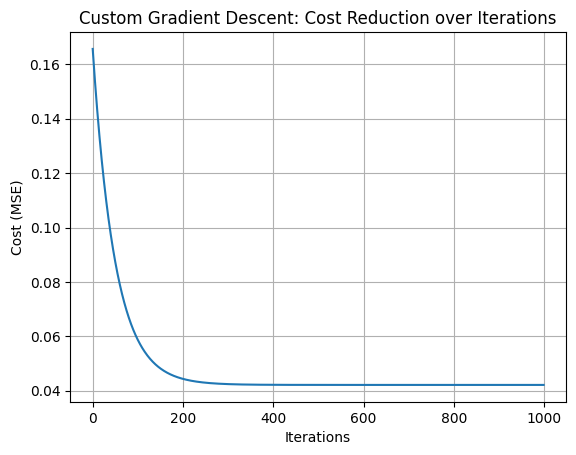

Custom Gradient Descent - Final theta values: [ 5.01681844e-01 -2.26070595e-04 -1.30030779e-04 -1.82179980e-03
  4.57707130e-04 -2.61544498e-03 -7.59284103e-03  1.52918429e-02
  2.66696646e-03  1.39423435e-03  4.72002427e-03  1.08763140e-03]
Custom Gradient Descent - Final cost: 0.04214831336164111


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 1. Function to scale features
def scale_features(X):
    """Standardize features using sklearn's StandardScaler."""
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return np.c_[np.ones(X_scaled.shape[0]), X_scaled], scaler

# Function to compute
def compute_cost(X, y, theta):
    """Compute the Mean Squared Error (MSE)."""
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost

# Gradient Descent Function
def gradient_descent(X, y, theta, learning_rate, num_iters):
    """Perform gradient descent to optimize theta."""
    m = len(y)
    cost_history = np.zeros(num_iters)

    for i in range(num_iters):
        gradients = (1 / m) * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradients
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

# Function to run Custom Gradient Descent
def run_custom_gradient_descent(X, y, learning_rate=0.01, num_iters=1000):
    """Runs gradient descent and plots cost history."""
    X_scaled, _ = scale_features(X)
    theta = np.zeros(X_scaled.shape[1])
    theta_optimized, cost_history = gradient_descent(X_scaled, y, theta, learning_rate, num_iters)

    plt.plot(range(num_iters), cost_history)
    plt.title('Custom Gradient Descent: Cost Reduction over Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Cost (MSE)')
    plt.grid(True)
    plt.show()

    final_cost = cost_history[-1]
    print(f"Custom Gradient Descent - Final theta values: {theta_optimized}")
    print(f"Custom Gradient Descent - Final cost: {final_cost}")
    return theta_optimized, final_cost

# Main function to run everything
def main():
    # Sample dataset
    X = np.random.rand(1599, 11)  # Random feature matrix for example
    y = np.random.rand(1599)  # Random target vector for example

    # Run custom gradient descent
    print("Running Custom Gradient Descent...")
    theta_optimized, final_cost = run_custom_gradient_descent(X, y)

if __name__ == "__main__":
    main()


**random forest model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import numpy as np

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [ ]:
random_red= RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
random_red.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [ ]:
pred_random = random_red.predict(x_test)

In [ ]:
# R squared error
error_score = r2_score(y_test, pred_random)
print("R squared error: ", error_score)

# Mean Squared Error (MSE)
rf_mse = mean_squared_error(y_test, pred_random)
print("Mean Squared Error of rf (MSE): ", rf_mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(rf_mse)
print("Root Mean Squared Error (RMSE): ", rmse)


R squared error:  0.5140359704832456
Mean Squared Error of rf (MSE):  0.31758034073468455
Root Mean Squared Error (RMSE):  0.5635426698438056


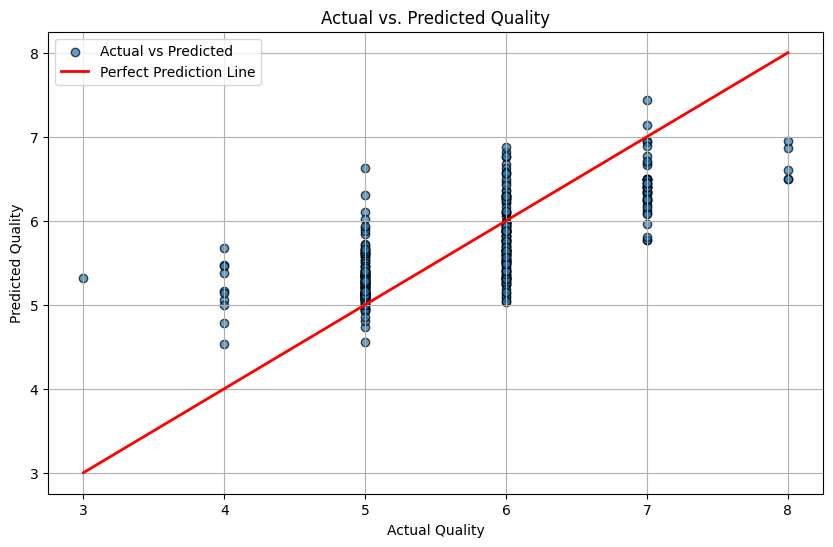

In [ ]:
# Plot actual vs. predicted Quality
plt.figure(figsize=(10, 6))
plt.scatter(y_test, pred_random, alpha=0.7, edgecolors='k', label="Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-', lw=2, label="Perfect Prediction Line")
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs. Predicted Quality')
plt.legend()
plt.grid(True)
plt.show()


**Linear Regression model**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [ ]:
linear_red = LinearRegression()
linear_red.fit(X_train, y_train)

LinearRegression()

In [ ]:
pred_linear = linear_red.predict(X_test)

In [ ]:
# R-squared error
error_score = metrics.r2_score(y_test, pred_linear)
print("R squared error:", error_score)

# Mean Squared Error (MSE)
lr_mse = metrics.mean_squared_error(y_test, pred_linear)
print("Mean Squared Error of lr(MSE):", lr_mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(lr_mse)
print("Root Mean Squared Error (RMSE):", rmse)

R squared error: 0.40318034127962177
Mean Squared Error of lr(MSE): 0.390025143963955
Root Mean Squared Error (RMSE): 0.624519930798013


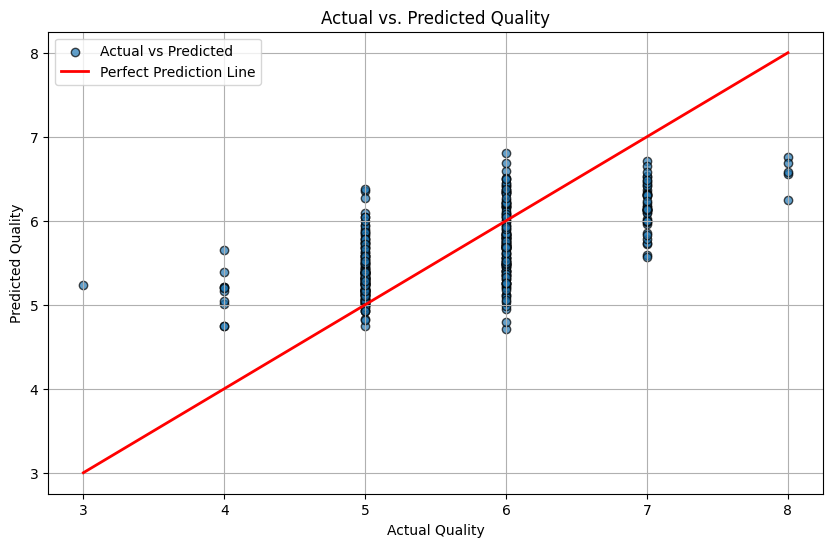

In [ ]:
# Plot actual vs. predicted Quality
plt.figure(figsize=(10, 6))
plt.scatter(y_test, pred_linear, alpha=0.7, edgecolors='k', label="Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-', lw=2, label="Perfect Prediction Line")
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs. Predicted Quality')
plt.legend()
plt.grid(True)
plt.show()

**Decision Trees model**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [ ]:
# i used decisiontreeregressor because im solving regression problems
decision_red = DecisionTreeRegressor(random_state=42)
decision_red.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
pred_decision = decision_red.predict(X_test)

In [ ]:
# R² score
r2 = r2_score(y_test, pred_decision )
print("R squared error (R²): ", r2)

# MSE (Mean Squared Error)
dt_mse = mean_squared_error(y_test, pred_decision )
print("Mean Squared Error (MSE): ", dt_mse)

# RMSE (Root Mean Squared Error)
rmse = np.sqrt(dt_mse)
print("Root Mean Squared Error (RMSE): ", rmse)

R squared error (R²):  0.04840179919006571
Mean Squared Error (MSE):  0.621875
Root Mean Squared Error (RMSE):  0.7885905147793751


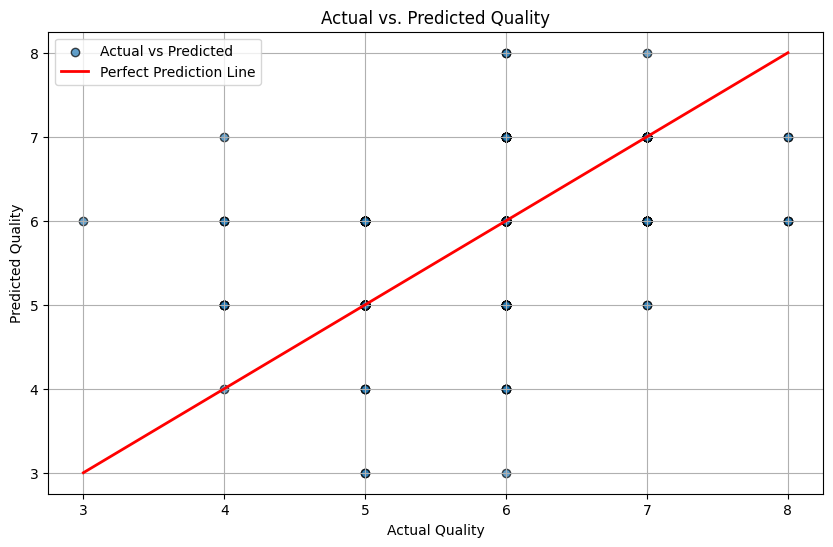

In [ ]:
# Plot actual vs. predicted Quality
plt.figure(figsize=(10, 6))
plt.scatter(y_test, pred_decision, alpha=0.7, edgecolors='k', label="Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-', lw=2, label="Perfect Prediction Line")
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs. Predicted Quality')
plt.legend()
plt.grid(True)
plt.show()

**saving the best model using joblib library**

In [ ]:
import joblib

# Dictionary storing the models and their MSE values (assuming this is precomputed)
model_performance = {
    'Linear Regression': lr_mse,  # Precomputed MSE for Linear Regression
    'Decision Tree': dt_mse,      # Precomputed MSE for Decision Tree
    'Random Forest': rf_mse       # Precomputed MSE for Random Forest
}

# Find the best performing model based on MSE
best_model_name = min(model_performance, key=model_performance.get)
best_model_mse = model_performance[best_model_name]

print(f"Best Performing Model: {best_model_name} with MSE: {best_model_mse}")

# Save the best model based on its name
if best_model_name == 'Linear Regression':
    joblib.dump(lr_mse, 'best_model.pkl')
elif best_model_name == 'Decision Tree':
    joblib.dump(dt_mse, 'best_model.pkl')
elif best_model_name == 'Random Forest':
    joblib.dump(rf_mse, 'best_model.pkl')

print(f"{best_model_name} model saved as 'best_model.pkl'.")

Best Performing Model: Random Forest with MSE: 0.31758034073468455
Random Forest model saved as 'best_model.pkl'.


**Predicting Red Wine Quality : User-Input Model**

In [ ]:
import numpy as np
import joblib

# Function to predict wine quality based on user input
def predict_wine_quality():
    # Load the saved model and scaler
    model = joblib.load('/content/best_model.pkl')
    scaler = joblib.load('/content/scaler.pkl')

    # Get input values from the user
    fixed_acidity = float(input("Enter Fixed Acidity: "))
    volatile_acidity = float(input("Enter Volatile Acidity: "))
    citric_acid = float(input("Enter Citric Acid: "))
    residual_sugar = float(input("Enter Residual Sugar: "))
    ph = float(input("Enter pH level: "))
    alcohol = float(input("Enter Alcohol Content: "))

    # Construct the input array for prediction
    features = np.array([[fixed_acidity, volatile_acidity, citric_acid, residual_sugar, ph, alcohol]])

    # Scale the input features using the same scaler
    features_scaled = scaler.transform(features)

    # Predict the quality using the trained model
    prediction = model.predict(features_scaled)[0]

    # the predicted quality is within the 0-10 range (round to nearest value)
    predicted_quality = round(np.clip(prediction, 0, 10), 2)

    print(f"Predicted Wine Quality (out of 10): {predicted_quality}")


Model and scaler have been saved successfully!
